In [131]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pickle
from sklearn.decomposition import PCA
from itertools import cycle
import matplotlib.pylab as plt

### Find missing values

In [132]:
data = pd.read_csv('./data/agaricus-lepiota.data')
data.replace("?", pd.NA, inplace=True)
data.isna().any()

p      False
x      False
s      False
n      False
t      False
p.1    False
f      False
c      False
n.1    False
k      False
e      False
e.1     True
s.1    False
s.2    False
w      False
w.1    False
p.2    False
w.2    False
o      False
p.3    False
k.1    False
s.3    False
u      False
dtype: bool

### Preprocessing data by removing all rows that have missing values 

In [133]:
data = data.dropna()
data

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7985,e,b,y,n,f,n,f,c,b,w,...,y,n,n,p,w,t,p,w,y,p
8000,e,x,y,n,f,n,f,c,b,w,...,y,n,n,p,w,t,p,w,y,p
8037,e,x,y,g,t,n,f,c,b,w,...,s,w,w,p,w,t,p,w,y,p
8094,p,x,y,c,f,m,f,c,b,y,...,y,c,c,p,w,n,n,w,c,d


### Encoding the data to numbers

In [134]:
lben = LabelEncoder()

for column in data.columns:
    data[column] = lben.fit_transform(data[column])
    
data

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,0,5,2,7,1,0,1,0,0,2,...,2,5,5,0,0,1,3,2,2,1
1,0,0,2,6,1,3,1,0,0,3,...,2,5,5,0,0,1,3,2,2,3
2,1,5,3,6,1,6,1,0,1,3,...,2,5,5,0,0,1,3,1,3,5
3,0,5,2,3,0,5,1,1,0,2,...,2,5,5,0,0,1,0,2,0,1
4,0,5,3,7,1,0,1,0,0,3,...,2,5,5,0,0,1,3,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7985,0,0,3,4,0,5,1,0,0,7,...,3,3,3,0,0,2,3,5,5,4
8000,0,5,3,4,0,5,1,0,0,7,...,3,3,3,0,0,2,3,5,5,4
8037,0,5,3,3,1,5,1,0,0,7,...,2,5,5,0,0,2,3,5,5,4
8094,1,5,3,1,0,4,1,0,0,8,...,3,1,1,0,0,0,2,5,1,0


### Split the data into two parts: a training part and a testing part

In [135]:
features = data.drop(columns='p')
target = data['p']

In [136]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=1/3.0, random_state=42)
print(f"Length of X train: {len(X_train)}")
print(f"Length of y train: {len(y_train)}")
print(f"Length of X test: {len(X_test)}")
print(f"Length of y test: {len(y_test)}")

Length of X train: 3762
Length of y train: 3762
Length of X test: 1881
Length of y test: 1881


### Training data with Support Vector Machine model

In [137]:
svc_model = SVC(kernel="linear").fit(X_train, y_train)

y_predict = svc_model.predict(X_test)
svc_model.score(X_test, y_test)

0.986709197235513

### Save the model

In [138]:
pickle.dump(svc_model, open("SVM_Model.sav", "wb"))

### Calculate the accuracy, recallm precision and F1

Text(0.5, 1.0, 'Number label of each type of Y Test')

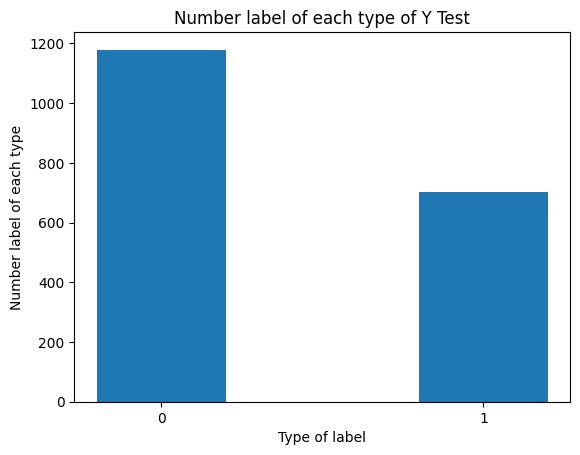

In [139]:
y_test_values, y_test_counts = np.unique(y_test, return_counts=True)
plt.bar([str(value) for value in y_test_values], y_test_counts, width=0.4)
plt.xlabel("Type of label")
plt.ylabel("Number label of each type")
plt.title("Number label of each type of Y Test")

Text(0.5, 1.0, 'Number label of each type of Y Predict')

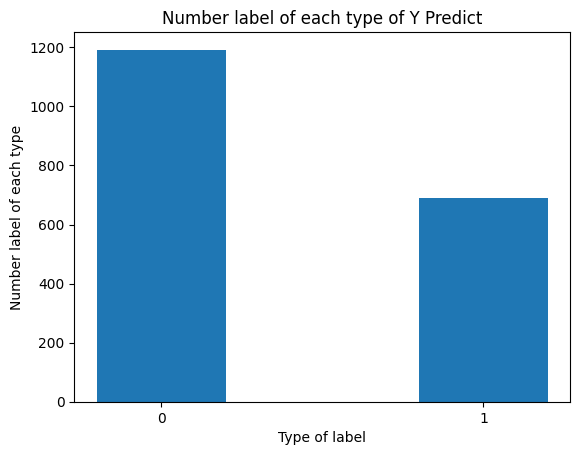

In [140]:
y_pred_values, y_pred_counts = np.unique(y_predict, return_counts=True)
plt.bar([str(value) for value in y_pred_values], y_pred_counts, width=0.4)
plt.xlabel("Type of label")
plt.ylabel("Number label of each type")
plt.title("Number label of each type of Y Predict")

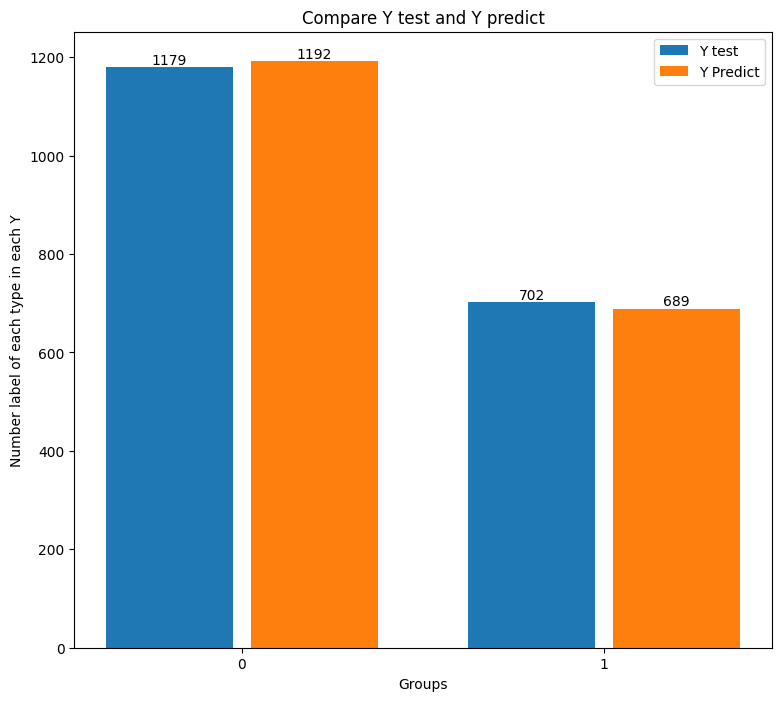

In [157]:
groups = ["0", "1"]
X_axis = np.arange(len(groups)) 

    
plt.figure(figsize=(9,8))



for bar in plt.bar(X_axis - 0.2, y_test_counts, width=0.35, label="Y test"):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom')
    
for bar in plt.bar(X_axis + 0.2, y_pred_counts, width=0.35, label="Y Predict"):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom')


plt.xticks(X_axis, groups) 
plt.xlabel("Groups")
plt.ylabel("Number label of each type in each Y")
plt.title("Compare Y test and Y predict")
plt.legend()

In [141]:
from sklearn.metrics import confusion_matrix, accuracy_score

accuracy = accuracy_score(y_test, y_predict)
accuracy

0.986709197235513

In [142]:
confusion_matrix(y_predict, y_test)

array([[1173,   19],
       [   6,  683]], dtype=int64)

In [143]:
tn, fp, fn, tp = confusion_matrix(y_predict, y_test).ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2*(precision*recall)/(precision+recall)

print(f"Precisioin = {precision}")
print(f"Recall = {recall}")
print(f"F1 = {f1}")

Precisioin = 0.9729344729344729
Recall = 0.9912917271407837
F1 = 0.9820273184759165


### Transform 22-D data to 2-D data and display it 

In [144]:
pca_model = PCA(n_components = 2, whiten = True).fit(features)
features_pca = pca_model.transform(features)

pd.DataFrame(data = features_pca)

,0,1
0,1.014644,-1.197826
1,0.345154,-1.579045
2,0.110157,-1.503249
3,0.062784,-1.086028
4,0.829105,-1.176290
...,...,...
5638,-1.310219,-0.166971
5639,-1.314500,0.106611
5640,-1.578223,-0.635607
5641,-1.681527,1.178867


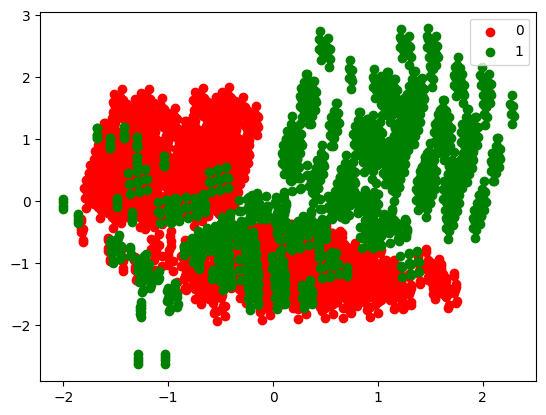

In [145]:
colors = cycle("rgb")
target_names = [0, 1]

plt.figure()

target_list = target.to_numpy().flatten()
for t_name, c in zip(target_names, colors):
    plt.scatter(features_pca[target_list == t_name, 0], features_pca[target_list == t_name, 1], c=c, label=t_name)

plt.legend()    
plt.show()